# **CUSTOMER CHURN MACHINE LEARNING PROJECT**

## **Business Understanding**
**Problem Statement:** High customer churn in the telecom industry leads to significant revenue loss due to fierce competition and high customer acquisition costs. To mitigate this challenge, telecom companies need to understand the factors influencing customer churn and develop methods to predict which customers are at risk of leaving. This will allow them to implement proactive customer retention strategies and minimize churn.


**Objective:** The objective of this project is to develop a machine learning model that can accurately predict whether a customer will churn based on their usage patterns, service history, and demographic information. By identifying customers who are at high risk of churning, the company can implement targeted retention strategies to improve customer loyalty and reduce churn rates.

**Stakeholders** The stakeholders of this project are the Telecommunication industry. 

**Key Metrics and Success Criteria**

The key metrics and success criteria for this project are as follows:
1. Accuracy

* The proportion of correctly predicted churn and non-churn cases out of the total predictions.  Provides an overall measure of how well the model is performing.

2. Precision

* The proportion of correctly predicted positive churn cases out of all cases predicted as churn.

3. Recall (Sensitivity)

* The proportion of actual churn cases that are correctly identified by the model.

4. F1-Score

* The harmonic mean of precision and recall. It provides a single metric that balances precision and recall, useful when the classes are imbalanced.

5. Area Under the Receiver Operating Characteristic Curve (AUC-ROC)

* A measure of the model's ability to distinguish between churn and non-churn cases. It provides an aggregate measure of performance across all classification thresholds, valuable for evaluating the model's overall ability to discriminate between classes.

6. Confusion Matrix

* A table showing the true positives, true negatives, false positives, and false negatives. It provides detailed insight into the types of errors the model is making.

7. Logarithmic Loss (Log Loss)

* A measure of the accuracy of probabilistic predictions. It takes into account the uncertainty of predictions and penalizes incorrect predictions with higher certainty more than those with lower certainty.

**Hypothesis**

Null Hypothesis (H₀): There is no association between the number of services a customer uses and their likelihood of churning.

This hypothesis assumes that using more or fewer services doesn't affect customer churn.

Alternative Hypothesis (H₁): There is a negative association between the number of services a customer uses and their likelihood of churning.

This hypothesis states that customers who use more services are less likely to churn (opposite of what the original statement suggests).


**Analytical Questions**
1. What are the demographic characteristics (e.g., age, gender, location) of customers who are most likely to churn?
2. Is there a correlation between the length of time a customer has been with the company and their likelihood of churning?
3. How does the monthly service fee impact customer churn? Are there price points that are more likely to lead to churn?
4. What types of services (e.g., phone, internet, fiber optic) are most churn-prone? Are there specific combinations of services that are less likely to result in churn?
5. How do payment methods (e.g., credit card, bank transfer, mailed check) relate to customer churn?
6. Is there a relationship between a customer's contract type (e.g., month-to-month, one-year, two-year) and their likelihood of churning?
7. Do customers with higher monthly charges or total charges exhibit different churn behaviors compared to those with lower charges?

## **Data Understanding**

#### **Import libraries**
First we import the relevant libraries 

In [1]:
#Import the necessary libraries 
import pyodbc 
import sqlalchemy as sa 
from sqlalchemy import create_engine, Table, select, MetaData
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
from dotenv import dotenv_values
from dotenv import load_dotenv
import os
import openpyxl

from scipy.stats import chi2_contingency, pointbiserialr
from sklearn.preprocessing import LabelEncoder,OneHotEncoder, StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,ConfusionMatrixDisplay, roc_curve, auc,precision_recall_curve
from sklearn.model_selection import train_test_split,GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest, f_classif
warnings.filterwarnings('ignore')

#### **Load the Dataset**
**Data sources**

The data used in the project is derived from three different data sources 
1. A table from a database
2. A csv file from a Github repository 
3. An excel file from OneDrive 

Lets import the first dataset, this dataset is part of a database. 


In [2]:
#import the dataset
#load the environment variables from the env file into a dictionary
environment_variables=dotenv_values('.env')

# Get the values for the credentials set up in the .env file
database=environment_variables.get('database_name')
server=environment_variables.get('server_name')
username=environment_variables.get('login')
password=environment_variables.get('password')

connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"
connection= pyodbc.connect(connection_string)

Using a query to retrieve the table in question from the database 

In [3]:
#write a select statement to select all records from the table in question
query='select * from dbo.LP2_Telco_churn_first_3000'

#create a pandas dataframe from the query
data_1=pd.read_sql(query, connection)

#Display the dataframe
data_1

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2209-XADXF,Female,False,False,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,False,Bank transfer (automatic),25.250000,25.250000,False
2996,6620-JDYNW,Female,False,False,False,18,True,True,DSL,True,...,True,False,False,False,Month-to-month,True,Mailed check,60.599998,1156.349976,False
2997,1891-FZYSA,Male,True,True,False,69,True,True,Fiber optic,False,...,False,False,True,False,Month-to-month,True,Electronic check,89.949997,6143.149902,True
2998,4770-UEZOX,Male,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,74.750000,144.800003,False


Load the second dataset from a csv file 

In [4]:
#read the data from the csv file and comit it to a dataframe
data_2=pd.read_csv('LP2_Telco-churn-second-2000.csv')

data_2

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
2039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
2040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
2041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


Load the third dataset from a =n excel file. This dataset is the test dataset

In [5]:
#read the data from the excel file and comit it to a dataframe
test_data=pd.read_excel('Telco-churn-last-2000.xlsx')
test_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8
2,9513-DXHDA,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55
3,2640-PMGFL,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55
4,3801-HMYNL,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,7912-SYRQT,Female,0,No,No,7,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),75.10,552.95
1996,3557-HTYWR,Female,0,No,No,47,Yes,Yes,DSL,Yes,Yes,No,Yes,No,Yes,Two year,No,Mailed check,74.05,3496.3
1997,4816-JBHOV,Male,1,No,No,2,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,44.70,93.7
1998,8920-NAVAY,Male,1,No,No,62,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),110.75,7053.35


#### **Exploratory Data Analysis**

1. **Data Quality** 

First compare the datasets to check whether they have the same columns

In [6]:
#compare the column names to see if the dataframes are similar 
same_columns = [col for col in data_1.columns if col in data_2.columns]
different_columns = [col for col in data_1.columns if col not in data_2.columns] + [col for col in data_2.columns if col not in data_1.columns]

if same_columns == data_1.columns.tolist():
    print("DataFrames have identical columns")
else:
    print(f"Same columns: {same_columns}")
    print(f"Different columns: {different_columns}")

DataFrames have identical columns


In [7]:
#compare the test data to the other dataframes 

same_columns=[col for col in data_1.columns if col in test_data.columns]
different_columns=[col for col in data_1.columns if col not in test_data.columns]+[col for col in test_data.columns if col not in data_1.columns]

if same_columns == data_1.columns.tolist():
    print("DataFrames have identical columns")
else:
    print(f"Same columns: {same_columns}")
    print(f"Different columns: {different_columns}")

Same columns: ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']
Different columns: ['Churn']


The test_data dataframe shall be used as the test data, while data_1 and data_2 shall be used as the training data set.

Concatenate data_1 and data_2 to form the training data


In [8]:
training_df=pd.concat([data_1,data_2], axis=0)
training_df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85,False
1,5575-GNVDE,Male,0,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.5,False
2,3668-QPYBK,Male,0,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,0,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.75,False
4,9237-HQITU,Female,0,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.800000,1990.5,No
2039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.200000,7362.9,No
2040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.600000,346.45,No
2041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.400000,306.6,Yes


In [9]:
training_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   int64  
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     4774 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    4392 non-null   object 
 10  OnlineBackup      4392 non-null   object 
 11  DeviceProtection  4392 non-null   object 
 12  TechSupport       4392 non-null   object 
 13  StreamingTV       4392 non-null   object 
 14  StreamingMovies   4392 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 
 17  

Check for duplicates in the training data 

In [10]:
#Check for duplicates
training_df.duplicated().sum()


0

In [11]:
#Get a list of column names from the dataset
training_df.columns.tolist()

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

Get a list of unique values in each column  of training_df

In [12]:
#define a dataframe with out the customer id =, and numerical columns
data=training_df[[ 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',  'Churn']]
def summary_function(df):
    """
    This function generates a dictionary containing unique values for each categorical column in a given dataframe.

    Parameters:
    df (pandas.DataFrame): The input dataframe.

    Returns:
    dict: A dictionary where keys are column names and values are lists of unique values for each categorical column.
    """
    dict = {}  # Initialize an empty dictionary to store the results

    for col in df.columns:  # Iterate over each column in the dataframe
      unique_values = df[col].unique().tolist()  # Get the unique values in the column
      new_values = {col: unique_values}  # Create a new dictionary entry with the column name as key and unique values as value
      dict.update(new_values)  # Update the main dictionary with the new entry
    return dict  # Return the final dictionary



dict=summary_function(data)

dict



{'gender': ['Female', 'Male'],
 'SeniorCitizen': [0, 1],
 'Partner': [True, False, 'No', 'Yes'],
 'Dependents': [False, True, 'No', 'Yes'],
 'PhoneService': [False, True, 'Yes', 'No'],
 'MultipleLines': [None, False, True, 'No', 'No phone service', 'Yes'],
 'InternetService': ['DSL', 'Fiber optic', 'No'],
 'OnlineSecurity': [False, True, None, 'No', 'Yes', 'No internet service'],
 'OnlineBackup': [True, False, None, 'No', 'Yes', 'No internet service'],
 'DeviceProtection': [False, True, None, 'No', 'Yes', 'No internet service'],
 'TechSupport': [False, True, None, 'Yes', 'No', 'No internet service'],
 'StreamingTV': [False, True, None, 'No', 'Yes', 'No internet service'],
 'StreamingMovies': [False, True, None, 'No', 'Yes', 'No internet service'],
 'Contract': ['Month-to-month', 'One year', 'Two year'],
 'PaperlessBilling': [True, False, 'Yes', 'No'],
 'PaymentMethod': ['Electronic check',
  'Mailed check',
  'Bank transfer (automatic)',
  'Credit card (automatic)'],
 'Churn': [False, 

Harmonize the columns so that they have similar values eg. the Partner has True, False, No and Yes values, ideally true and yes has the same meaning and no and false has the same meaning. I will replace all the No values with False and the Yes values to True.

In [13]:
# Define a function to convert a single value
def convert_bool(df):
    """
    Convert boolean values in a DataFrame to 'yes'/'no' values.
    
    Parameters:
    df (pd.DataFrame): The input DataFrame
    
    Returns:
    pd.DataFrame: DataFrame with boolean values values converted to 'yes'/'no'
    """
    # Define a function to convert a single value
    def convert_value(value):
        if isinstance(value, str) and 'No' in value:
            return 'No'            
        elif isinstance(value, bool):
            return 'Yes' if value else 'No'
        return value
    
    # Apply the conversion function to each element in the DataFrame
    return df.applymap(convert_value)


In [14]:
training_df =convert_bool(training_df)
test_data=convert_bool(test_data)

Check the unique values in the training dataset to check if the values have been harmonised to boolean values

In [15]:
data=training_df[[ 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',  'Churn']]

dict=summary_function(data)

dict

{'gender': ['Female', 'Male'],
 'SeniorCitizen': [0, 1],
 'Partner': ['Yes', 'No'],
 'Dependents': ['No', 'Yes'],
 'PhoneService': ['No', 'Yes'],
 'MultipleLines': [None, 'No', 'Yes'],
 'InternetService': ['DSL', 'Fiber optic', 'No'],
 'OnlineSecurity': ['No', 'Yes', None],
 'OnlineBackup': ['Yes', 'No', None],
 'DeviceProtection': ['No', 'Yes', None],
 'TechSupport': ['No', 'Yes', None],
 'StreamingTV': ['No', 'Yes', None],
 'StreamingMovies': ['No', 'Yes', None],
 'Contract': ['Month-to-month', 'One year', 'Two year'],
 'PaperlessBilling': ['Yes', 'No'],
 'PaymentMethod': ['Electronic check',
  'Mailed check',
  'Bank transfer (automatic)',
  'Credit card (automatic)'],
 'Churn': ['No', 'Yes', None]}

Check for missing Values 

In [16]:
training_df.isna().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

check the data types 

In [17]:
training_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   int64  
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     4774 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    4392 non-null   object 
 10  OnlineBackup      4392 non-null   object 
 11  DeviceProtection  4392 non-null   object 
 12  TechSupport       4392 non-null   object 
 13  StreamingTV       4392 non-null   object 
 14  StreamingMovies   4392 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 
 17  

In [18]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2000 non-null   object 
 1   gender            2000 non-null   object 
 2   SeniorCitizen     2000 non-null   int64  
 3   Partner           2000 non-null   object 
 4   Dependents        2000 non-null   object 
 5   tenure            2000 non-null   int64  
 6   PhoneService      2000 non-null   object 
 7   MultipleLines     2000 non-null   object 
 8   InternetService   2000 non-null   object 
 9   OnlineSecurity    2000 non-null   object 
 10  OnlineBackup      2000 non-null   object 
 11  DeviceProtection  2000 non-null   object 
 12  TechSupport       2000 non-null   object 
 13  StreamingTV       2000 non-null   object 
 14  StreamingMovies   2000 non-null   object 
 15  Contract          2000 non-null   object 
 16  PaperlessBilling  2000 non-null   object 


In [19]:
#First convert the string values in the Total Charges to missing values i.e. NAN 
def charges(value):
    if isinstance(value,str):
        return np.nan
    else:
        return value
    

training_df['TotalCharges']=training_df['TotalCharges'].apply(charges)

test_data['TotalCharges']=test_data['TotalCharges'].apply(charges)

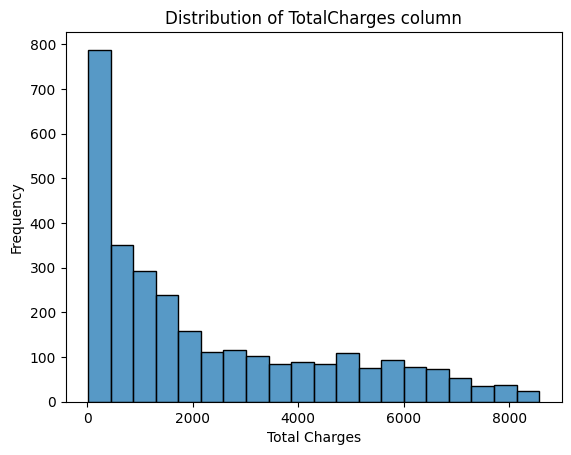

In [20]:
#check the distribution of the TotalCharges column 
sns.histplot(training_df['TotalCharges'], bins=20)
plt.title('Distribution of TotalCharges column')
plt.xlabel('Total Charges')
plt.ylabel('Frequency')
plt.show()

The TotalCharges is skewed to the right hence the mean is not an appropriate method to impute missing values, the median should be used since it is not affected by extreme values 

In [21]:
# check for duplicates in the test dataset

test_data.duplicated().sum()


0

In [22]:
#drop all missing values in a copy of the dataset for analysis purposes only 
copy_training=training_df.dropna()

#### **Univariate Analysis**

Univariate analysis is the simplest form of analyzing data. “Uni” means “one”, so in other words your data has only one variable. It doesn't deal with causes or relationships (unlike regression) and it's major purpose is to describe; it takes data, summarizes that data and finds patterns in the data.

The main purpose of univariate analysis is to describe the data and find patterns that exist within it.

This project will look at the distribution of the numerical variables through histograms and distribution of categoricaal variables using pie charts



**Numerical Variables**

In [23]:
copy_training.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,2078.000000,2078.000000,2078.000000,2078.000000
mean,0.202117,33.007700,82.148388,2906.336047
std,0.401676,24.706928,18.147540,2417.043377
min,0.000000,1.000000,43.549999,43.799999
25%,0.000000,9.000000,70.000000,656.787521
50%,0.000000,30.000000,84.000000,2341.900024
75%,0.000000,56.000000,95.750000,4904.700073
max,1.000000,72.000000,118.650002,8564.750000


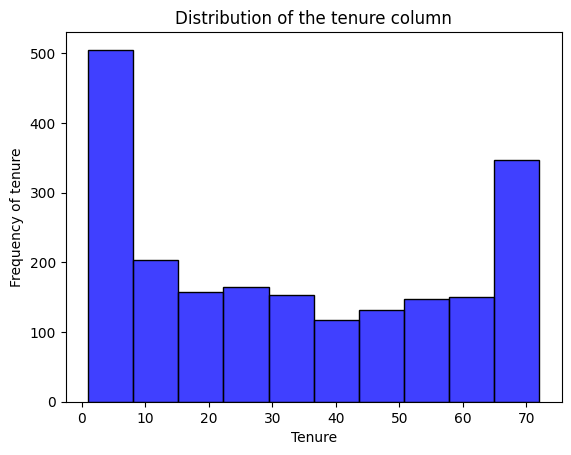

In [24]:
sns.histplot(copy_training['tenure'], bins=10, color='blue')
plt.title('Distribution of the tenure column')
plt.xlabel('Tenure')
plt.ylabel('Frequency of tenure')
plt.show()

Majority of the values are concentrated between 10 and 60 while there are extremes at both ends 

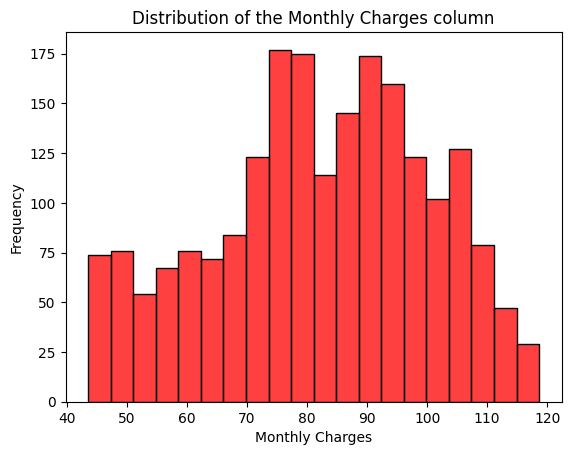

In [25]:
sns.histplot(copy_training['MonthlyCharges'], bins=20, color='red')
plt.title('Distribution of the Monthly Charges column')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.show()

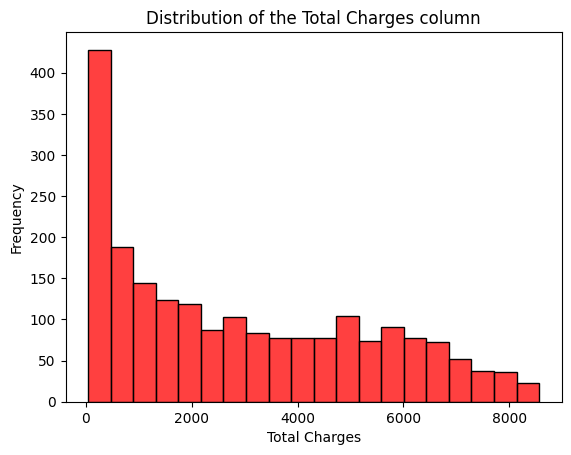

In [26]:
sns.histplot(copy_training['TotalCharges'], bins=20, color='red')
plt.title('Distribution of the Total Charges column')
plt.xlabel('Total Charges')
plt.ylabel('Frequency')
plt.show()

Plot boxplots for the numerical variables to check for outliers 

Text(0, 0.5, 'Value')

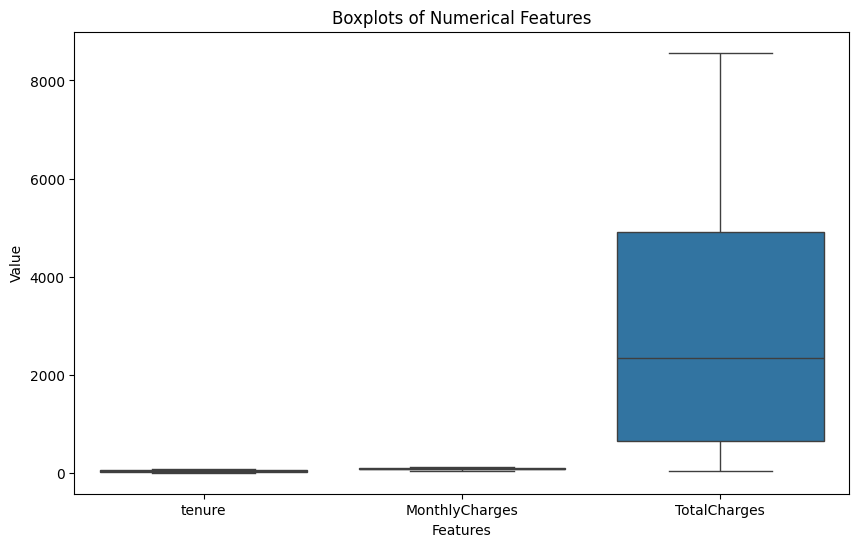

In [27]:
# Define numerical columns for which we want to create boxplots
numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Melt the dataframe to plot multiple boxplots in a single plot
df_melted =copy_training.melt(value_vars=numerical_columns)

# Set up the figure
plt.figure(figsize=(10, 6))

# Plot multiple boxplots
sns.boxplot(x='variable', y='value', data=df_melted)

# Set the title and labels
plt.title('Boxplots of Numerical Features')
plt.xlabel('Features')
plt.ylabel('Value')

Tenure and Monthly charges have no outliers while Total Charges has a lot of outliers 

**Categorical Variables**

In [28]:
# Function to plot and annotate pie charts
def plot_pie_charts(df, columns):
    fig, axes = plt.subplots(1, len(columns), figsize=(20, 5))
    
    for ax, column in zip(axes, columns):
        counts = df[column].value_counts()
        wedges, texts, autotexts = ax.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
        
        # Annotate the pie chart
        for text, autotext in zip(texts, autotexts):
            autotext.set_color('white')
            text.set_fontsize(12)
            autotext.set_fontsize(12)
        
        ax.set_title(column)
    
    plt.tight_layout()
    plt.show()



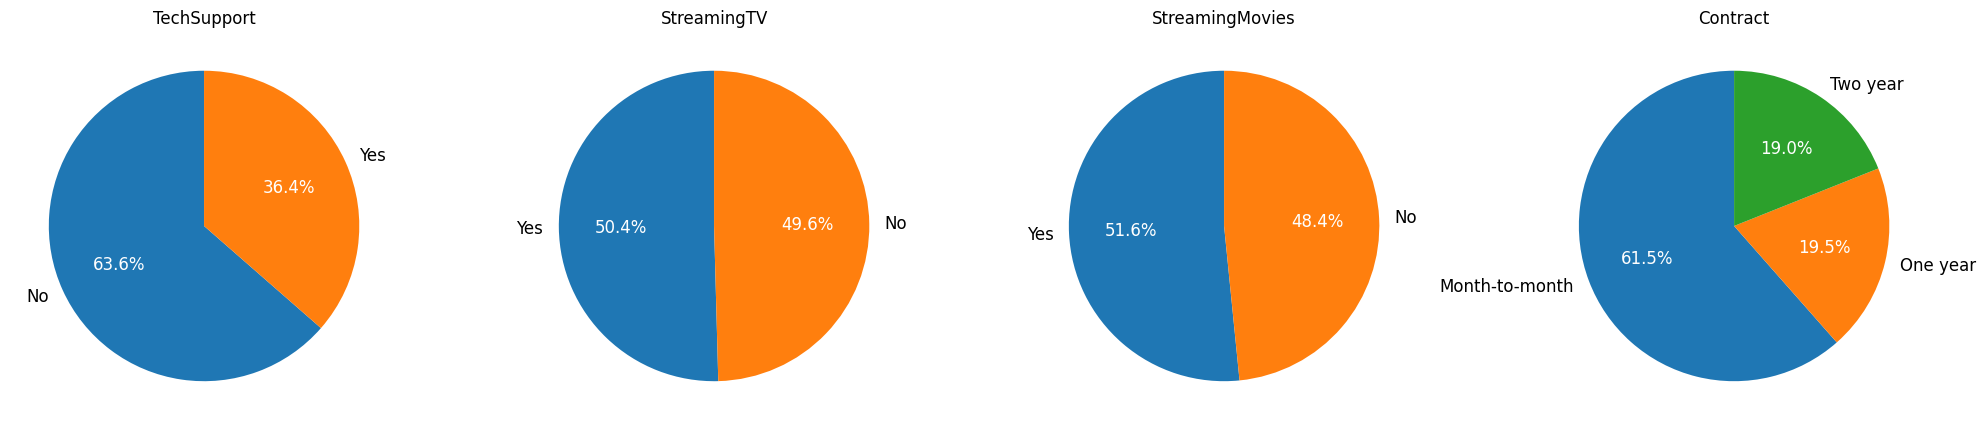

In [29]:
# Plot pie charts for specified columns
plot_pie_charts(copy_training, ['TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract'])

From the pie charts we can discern the following:
1. Majority of the customers dont have tech support
2. Majority of the customers dont have streaming services
3. The number of customers with streaming services is almost equal to those without the streaming services 
4. Majority of the customers have a month to month contract

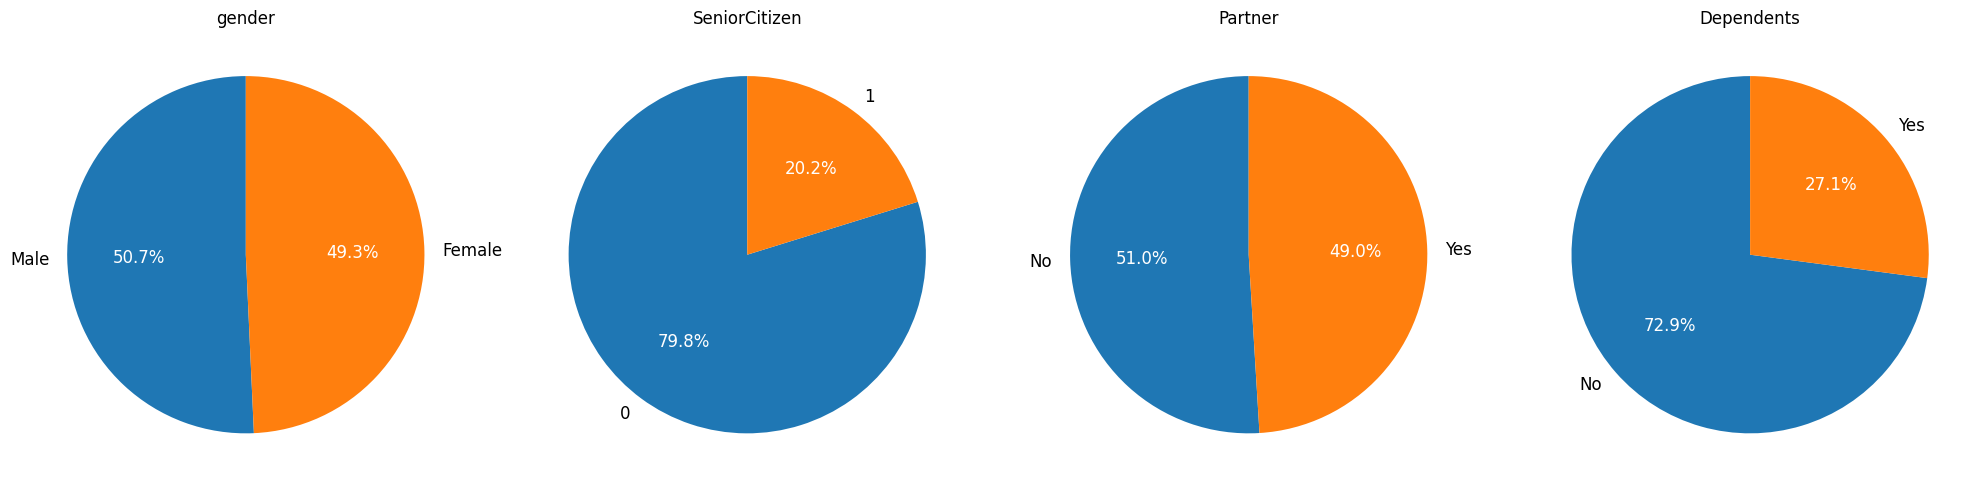

In [30]:
# Plot pie charts for specified columns
plot_pie_charts(copy_training,['gender', 'SeniorCitizen', 'Partner', 'Dependents'])

From the pie charts we can determine the following:
1. the demographics in terms of gender and those with partners are balanced
2. Majority of consumers are not senior citizens 
2. Majority of customers dont have dependants 

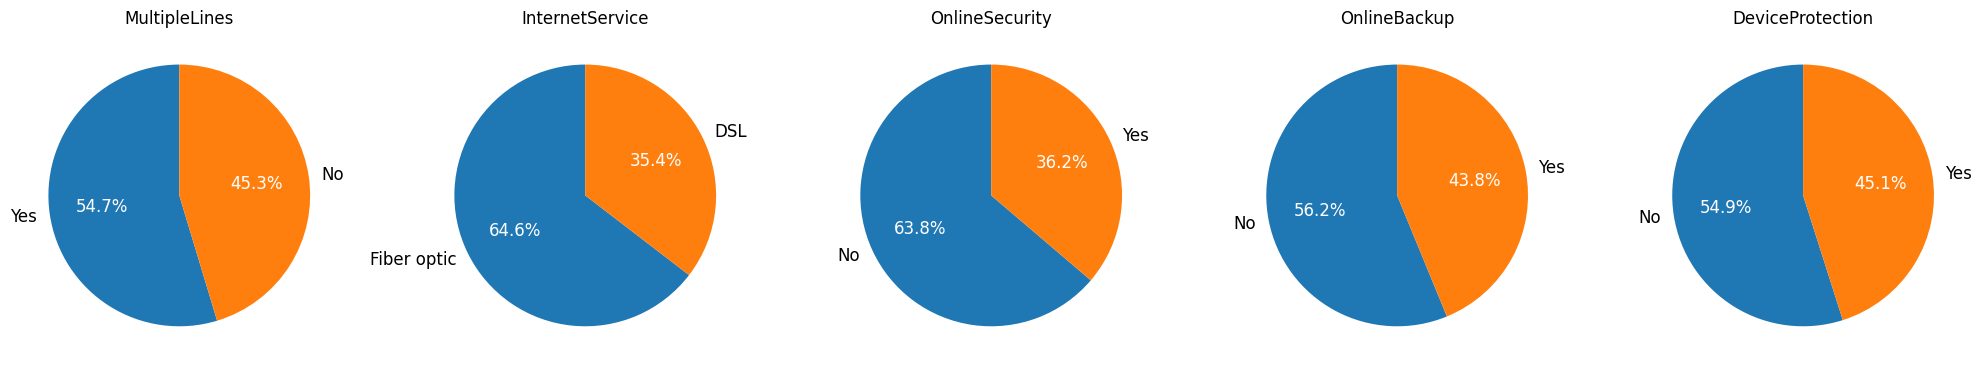

In [31]:
# Plot pie charts for specified columns
plot_pie_charts(copy_training,['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection'])

From the pie charts we can determine the following:
1. Majority of the customers dont have multiple lines
2. Majority of the customers have fiber optic internet service
3. Most customers dont subscribe to online security, Device protection and online back up services 

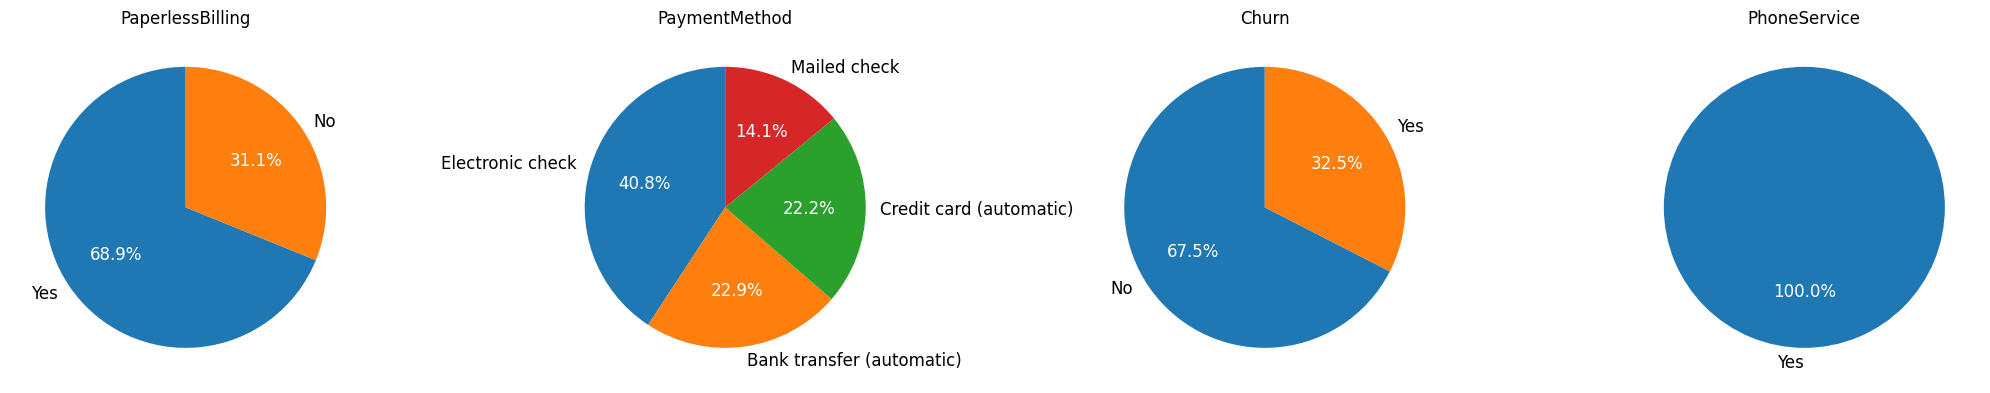

In [32]:
# Plot pie charts for specified columns
plot_pie_charts(copy_training,['PaperlessBilling', 'PaymentMethod',  'Churn','PhoneService'])

From the pie charts we can see that:
1. Most customers utilise paperless billing  and electronic checks as a payment method
2. Majority of the customers are still customers of the company 
3. Majority of the customers have phone services

**Bivariate Analysis**

Bivariate analysis is the simultaneous analysis of two variables (attributes). It explores the concept of relationship between two variables, whether there exists an association and the strength of this association, or whether there are differences between two variables and the significance of these differences.

This section will look at a comparative analysis of variables and relationships

numerical variables 
(inclusive of columns with only boolean values)

In [33]:
corr=copy_training.corr(numeric_only=True)
corr 

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,-0.019951,0.127765,0.009597
tenure,-0.019951,1.000000,0.433607,0.959628
MonthlyCharges,0.127765,0.433607,1.000000,0.610102
TotalCharges,0.009597,0.959628,0.610102,1.000000


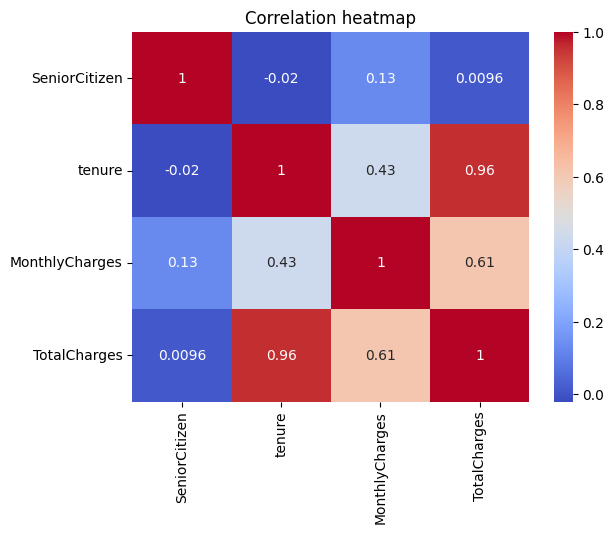

In [34]:
sns.heatmap(corr,annot=True,cmap="coolwarm")
plt.title("Correlation heatmap")
plt.show()

Most variables display a weak correlation with other variables apart from tenure and monthly charges,  and between  monthly charges and  total charges, Partners and dependants are moderately correlated 

**Multivariate analysis**

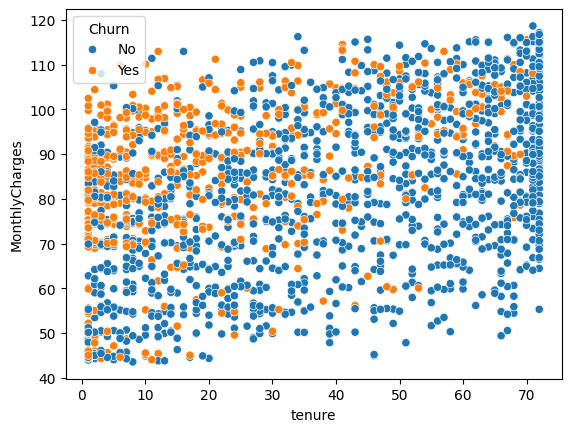

In [35]:
sns.scatterplot(data=copy_training, x='tenure', y='MonthlyCharges', hue='Churn')

plt.show()

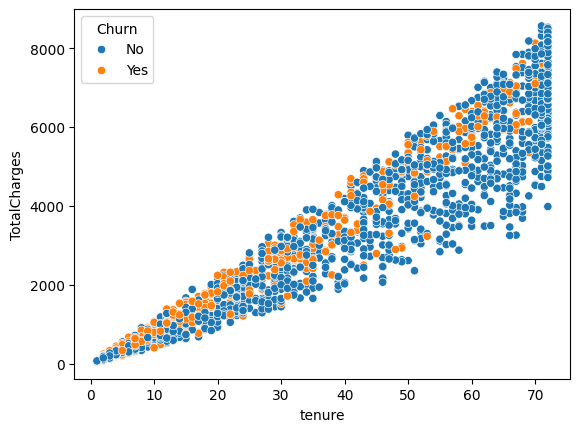

In [36]:
sns.scatterplot(data=copy_training, x='tenure', y='TotalCharges', hue='Churn')

plt.show()

### Analytical Questions 

1. What are the demographic characteristics (e.g., age, gender) of customers who are most likely to churn?


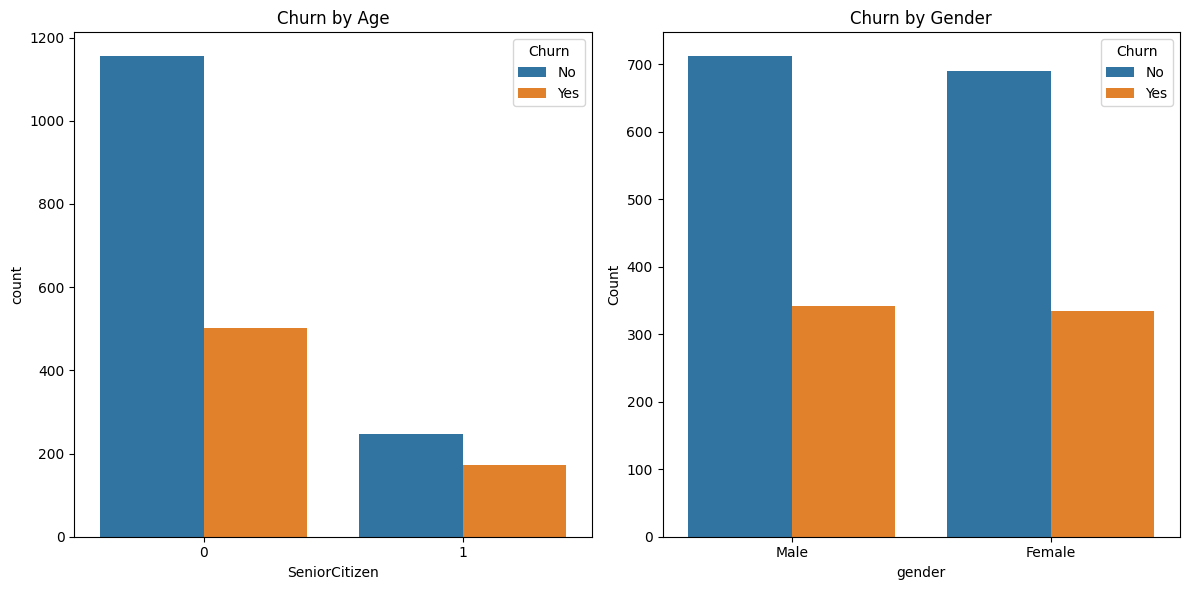

In [37]:

fig, axes=plt.subplots(1, 2, figsize=(12, 6))
# Age on the first subplot
sns.countplot(x='SeniorCitizen', hue='Churn', data=copy_training, ax=axes[0])
axes[0].set_title('Churn by Age')
sns.countplot(x='gender', hue='Churn', data=copy_training,ax=axes[1])
axes[1].set_title('Churn by Gender')

plt.tight_layout()
plt.ylabel('Count')
plt.show()

The churn rate is higher than for the younger generation compared to the older generation

The difference between the churn rate for males and females is small, we cannot infer that gender affects the chirn rate 

2. Is there a correlation between the length of time a customer has been with the company and their likelihood of churning?


In [38]:
# Calculate point biserial correlation
copy_training['Churn_numeric'] = copy_training['Churn'].map({'Yes': 1, 'No': 0})
correlation_coefficient, p_value = pointbiserialr(copy_training['tenure'], copy_training['Churn_numeric'].astype(int))

print(f'Point-Biserial Correlation Coefficient: {correlation_coefficient}')
print(f'P-value: {p_value}')



Point-Biserial Correlation Coefficient: -0.39631513717085526
P-value: 4.149665879395998e-79


The p value is less than 0.05 hence therefore we can infer statistical significance in the correlation coefficient, there is a weak negative correlation between Churn and tenure. 

3. How does the monthly service fee impact customer churn? Are there price points that are more likely to lead to churn?


In [39]:
# Calculate point biserial correlation
correlation, p_value = pointbiserialr(copy_training['Churn_numeric'], copy_training['MonthlyCharges'])

print(f'Point Biserial Correlation: {correlation}')
print(f'P-Value: {p_value}')



Point Biserial Correlation: 0.03674888712970492
P-Value: 0.09398155518650571


The p-value is greater than 0.05 so we cannot attribute statistical significance to the correlation between churn and monthly charges.

4. What types of services (e.g., phone, internet, fiber optic) are most churn-prone? Are there specific combinations of services that are less likely to result in churn?

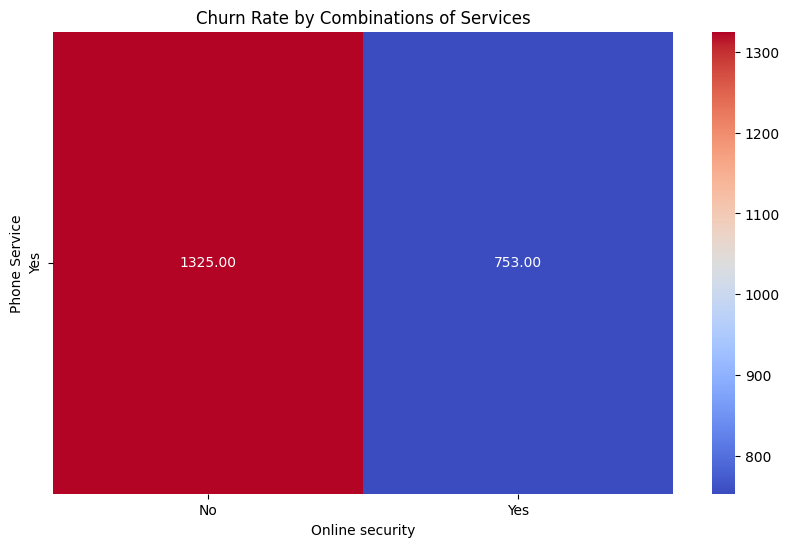

In [40]:
# Create a pivot table for combinations of services
pivot_table = copy_training.pivot_table(values='Churn', index='PhoneService', columns=['OnlineSecurity'], aggfunc='count')

# Heatmap for combinations of services
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Churn Rate by Combinations of Services')
plt.ylabel('Phone Service')
plt.xlabel('Online security')
plt.show()


From the analysis a combination of phone services and Online security services has a lower churn rate compare to having just one of the services 


5. How do payment methods (e.g., credit card, bank transfer, mailed check) relate to customer churn?


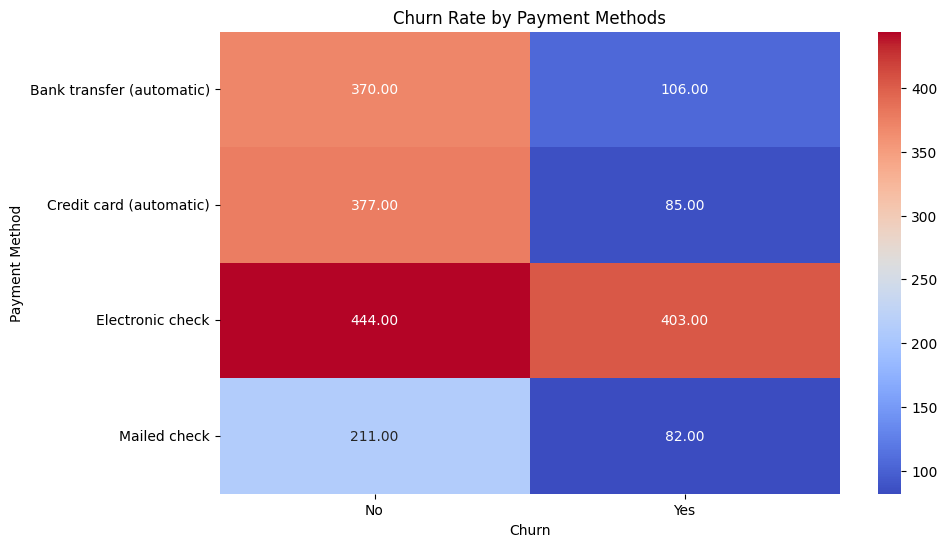

In [41]:
pivot_table_counts = copy_training.pivot_table(index='PaymentMethod', columns='Churn', aggfunc='size', fill_value=0)

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table_counts, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Churn Rate by Payment Methods')
plt.ylabel('Payment Method')
plt.xlabel('Churn')
plt.show()

The difference between those that churn and those that dont is higher in those that utilise Credit cards, bank transfers, and mailed checks with those who dont churn being the higher proportion. The difference in proportion between those that churn and dont is small in those that use electronic checks.   

6. Is there a relationship between a customer's contract type (e.g., month-to-month, one-year, two-year) and their likelihood of churning?


In [42]:
# Create contingency table
contingency_table = pd.crosstab(copy_training['Contract'], copy_training['Churn'])

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Output the results
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

Chi-square statistic: 355.92499739533224
P-value: 5.150730533956704e-78
Degrees of freedom: 2
Expected frequencies:
[[862.25024062 415.74975938]
 [273.92300289 132.07699711]
 [265.8267565  128.1732435 ]]


The p values is less than the alpha values, which indicates that the association between Contract type and Churn is significant. 

#### Hypothesis Testing 

In [43]:
col_count=['PhoneService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies']
def count_yes(row, columns):
    return sum(row[col] == 'Yes' for col in columns)

copy_training['Num_of_service']=copy_training.apply(lambda row: count_yes(row, col_count), axis=1)


In [87]:
copy_training.to_excel('BI.xlsx')

In [44]:
# Create a contingency table
contingency_table = pd.crosstab(copy_training['Num_of_service'], copy_training['Churn'])

# Perform chi-square test of independence
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f'Chi-square statistic: {chi2}')
print(f'P-value: {p_value}')

Chi-square statistic: 187.5661889700097
P-value: 8.375286644506439e-38


The p value is less than the alpha value 0.05 so we reject the null hypothesis therefore there is a significant relationship between the number of services and the churn 

### Data preparation 
This step involves the following:
splitting the data into X(independent) and Y(dependent) variables
Feature engineering, handling missing values, encoding and standardisation or nromalization
creating a pipeline to pre-process that data

**Splitting the data into X(independent) and Y(dependent) variables**

In [45]:
X=training_df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService','MultipleLines', 'InternetService',
 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
'PaymentMethod','tenure','MonthlyCharges','TotalCharges']]
y=training_df['Churn'].fillna(training_df['Churn'].mode()[0])

# Split the dataset into training and evaluation set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

**Preprocessing pipeline**

In [46]:
#define numerical and categorical features
numeric_features=['tenure','MonthlyCharges','TotalCharges']
categorical_features=['gender', 'Partner','SeniorCitizen', 'Dependents','PhoneService','MultipleLines', 'InternetService',
 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
'PaymentMethod']


In [47]:
#define pipeline steps for training data 
class ArrayToDataFrame(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return pd.DataFrame(X, columns=self.columns)

steps = [
    ('preprocess', ColumnTransformer(
        transformers=[
            ('num', Pipeline(steps=[
                ('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())
            ]), numeric_features),
            ('cat', Pipeline(steps=[
                ('imputer', SimpleImputer(strategy='most_frequent')),
                ('encoder', OneHotEncoder(handle_unknown='ignore'))
            ]), categorical_features)           
        ],remainder='drop'
    ))
]

## Create the pipeline
pipeline = Pipeline(steps=steps)


# Fit and transform the DataFrame
X_train_1 = pipeline.fit_transform(X_train)
x_test_1=pipeline.fit_transform(X_test)



In [48]:
# Get feature names
feature_names = pipeline.named_steps['preprocess'].named_transformers_['cat'].get_feature_names_out(categorical_features)
# Convert the encoded array back to a DataFrame
all_feature_names=numeric_features + list(feature_names)
encoded_df = pd.DataFrame(X_train_1, columns=all_feature_names)

encoded_df.head()


,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,SeniorCitizen_0,SeniorCitizen_1,Dependents_No,...,StreamingMovies_None,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.969448,0.970550,1.766359,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,-0.503205,1.048407,-0.295617,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.110400,-1.305530,-0.570663,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,-0.175949,1.041781,0.421981,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,-0.707740,0.592860,-0.363656,1.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [66]:
test_encoded_df=pd.DataFrame(x_test_1, columns=all_feature_names)
test_encoded_df.head()

,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,SeniorCitizen_0,SeniorCitizen_1,Dependents_No,...,StreamingMovies_None,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.738176,-0.181826,-0.293294,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1.020197,0.860900,1.794100,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.939620,0.504311,-0.293294,0.0,1.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
3,0.456154,1.051869,1.379145,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,-1.235976,0.353902,-0.991371,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [49]:
# encode the target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded= label_encoder.fit_transform(y_test)

### **Machine Learning Models and Evaluation**

**Distance Based Model (K nearest neighbour)**

In [50]:
knn_pipeline = Pipeline([
    ('classifier', KNeighborsClassifier(n_neighbors=5))  # Adjust n_neighbors as needed
])

knn_pipeline.fit(X_train_1, y_train_encoded)

Pipeline(steps=[('classifier', KNeighborsClassifier())])

In [51]:
# Predict
y_pred = knn_pipeline.predict(x_test_1)

**Evaluation of the model**


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       742
           1       0.57      0.54      0.55       267

    accuracy                           0.77      1009
   macro avg       0.70      0.70      0.70      1009
weighted avg       0.77      0.77      0.77      1009


Accuracy Score:
0.7710604558969276


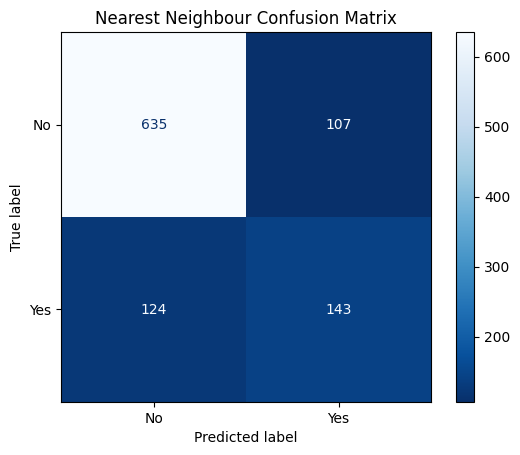

In [52]:
# Evaluate the model
def evaluate_model(y_true,y_scores,name):
    print("\nClassification Report:")
    print(classification_report(y_true, y_scores))

    print("\nAccuracy Score:")
    print(accuracy_score(y_true, y_scores))

    display = ConfusionMatrixDisplay(confusion_matrix(y_true, y_scores),display_labels=label_encoder.classes_)
    display.plot(cmap='Blues_r')
    plt.title(name)
    plt.show()


evaluate_model(y_test_encoded,y_pred,'Nearest Neighbour Confusion Matrix')

In [53]:
#define function to plot ROC and precison recall curves 

def plot_evaluation_curves(y_true,y_scores,name):

    #ROC Curve 
    fpr,tpr,_=roc_curve(y_true,y_scores)
    roc_auc=auc(fpr,tpr)

    #Precision-Recall Curve 
    precision, recall,_=precision_recall_curve(y_true,y_scores)

    #Plot ROC curve
    plt.figure(figsize=(10,5))
    plt.title(name)

    plt.subplot(1,2,1)
    plt.plot(fpr,tpr, color='red',lw=2,label=f'ROC Curve (area = {roc_auc:.2f})')
    plt.plot([0,1],[0,1], color='navy',lw=2,linestyle='--')
    plt.ylim([0.0,1.05])
    plt.xlim([0.0,1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")

    #Plot Precision-Recall curve
    plt.subplot(1,2,2)
    plt.plot(recall, precision, color="darkorange", lw=2)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')

    plt.tight_layout()
    plt.show()

**Evaluation Curves for KNN**

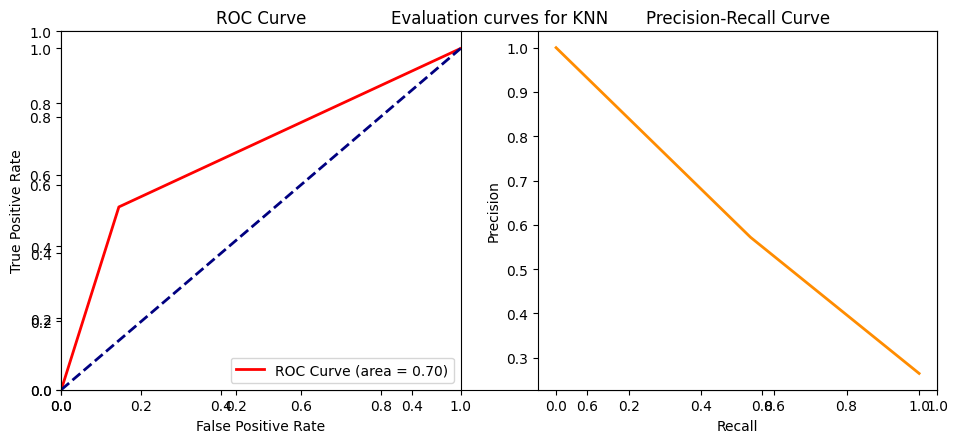

In [54]:
plot_evaluation_curves(y_test_encoded,y_pred,'Evaluation curves for KNN')

**Gradient Descent Model**

Model creation and prediction

In [55]:
#create pipeline for Gradient Descent Modelevaluate_model(y_test_encoded,y_pred)
gb_pipeline = Pipeline([
    ('classifier', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42))
])
 #fit the model using the pipeline
gb_pipeline.fit(X_train_1, y_train_encoded)
#make predictions 
y_pred_gb=gb_pipeline.predict(x_test_1)


Model evaluation 


Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.93      0.87       742
           1       0.70      0.45      0.54       267

    accuracy                           0.80      1009
   macro avg       0.76      0.69      0.71      1009
weighted avg       0.79      0.80      0.79      1009


Accuracy Score:
0.8017839444995044


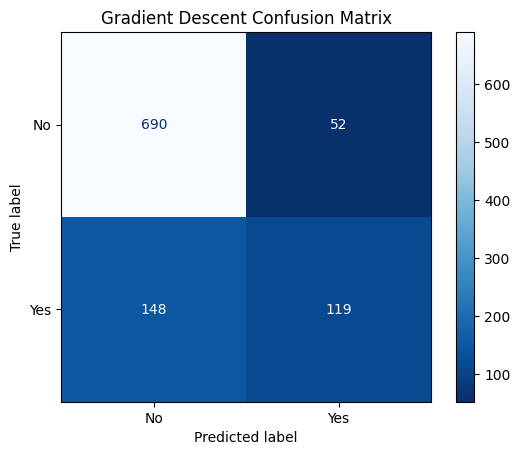

In [56]:
evaluate_model(y_test_encoded,y_pred_gb,'Gradient Descent Confusion Matrix')

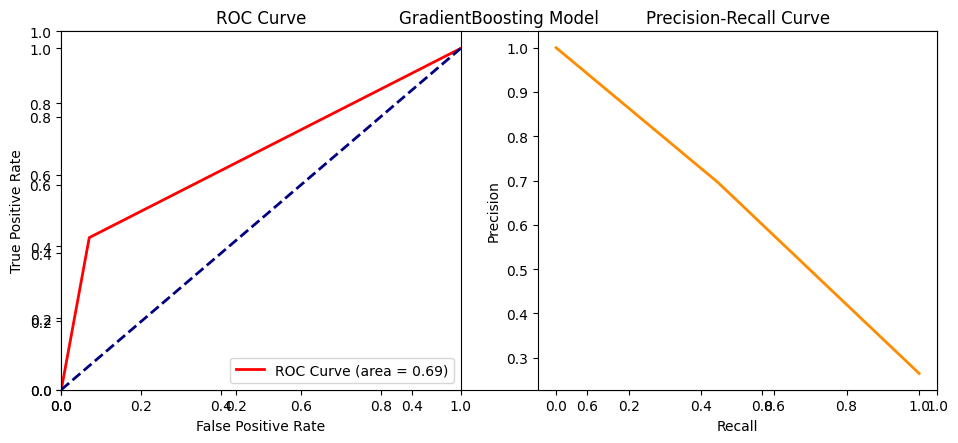

In [57]:
plot_evaluation_curves(y_test_encoded,y_pred_gb, 'GradientBoosting Model')

**Tree Based Model (Random Forest)**

Model creation and prediction 

In [58]:
rf_pipeline = Pipeline([
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))  
])

rf_pipeline.fit(X_train_1, y_train_encoded)

y_pred_rf=rf_pipeline.predict(x_test_1)

Model evaluation 


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       742
           1       0.66      0.46      0.55       267

    accuracy                           0.79      1009
   macro avg       0.74      0.69      0.71      1009
weighted avg       0.78      0.79      0.78      1009


Accuracy Score:
0.7948463825569871


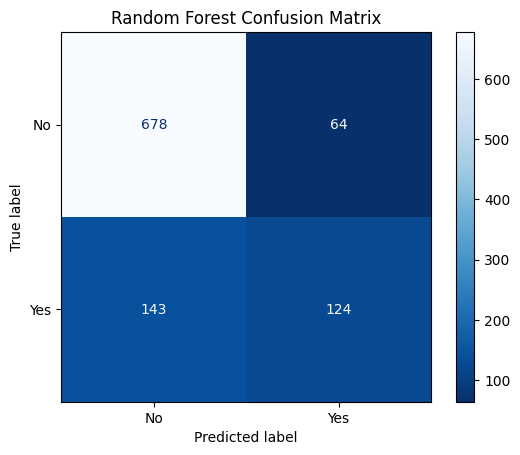

In [59]:
evaluate_model(y_test_encoded,y_pred_rf,'Random Forest Confusion Matrix')

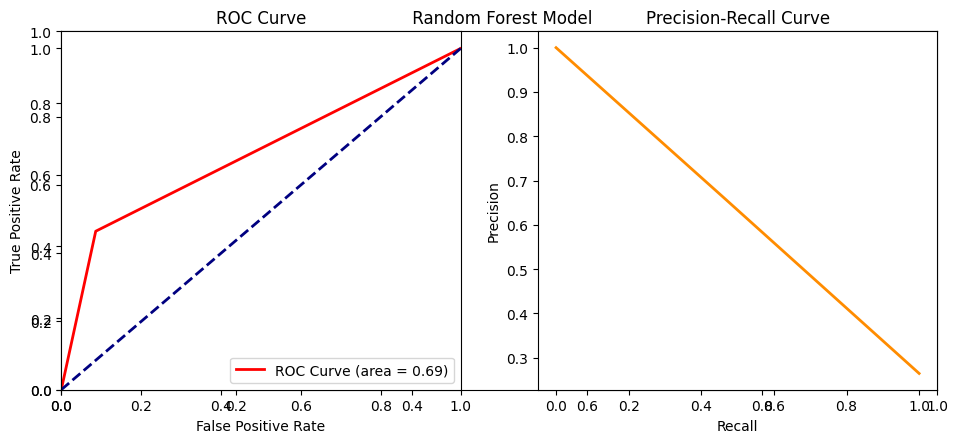

In [60]:
plot_evaluation_curves(y_test_encoded,y_pred_rf,' Random Forest Model')

**ROC Curve:**

The model's ROC curve shows that it has a decent ability to discriminate between positive and negative classes, with an AUC of 0.70.

**Precision-Recall Curve:**

The model starts with high precision, indicating that when it predicts a positive class, it is usually correct.
As recall increases, precision decreases, suggesting that the model becomes less certain about its positive predictions as it tries to capture all positive instances.

**Decision Tree Model**

In [61]:
dt_pipeline = Pipeline([
    ('classifier', DecisionTreeClassifier( random_state=42))
])

dt_pipeline.fit(X_train_1, y_train_encoded)

y_pred_dt=dt_pipeline.predict(x_test_1)

Model Evaluation


Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.81      0.81       742
           1       0.46      0.44      0.45       267

    accuracy                           0.71      1009
   macro avg       0.63      0.63      0.63      1009
weighted avg       0.71      0.71      0.71      1009


Accuracy Score:
0.7145688800792864


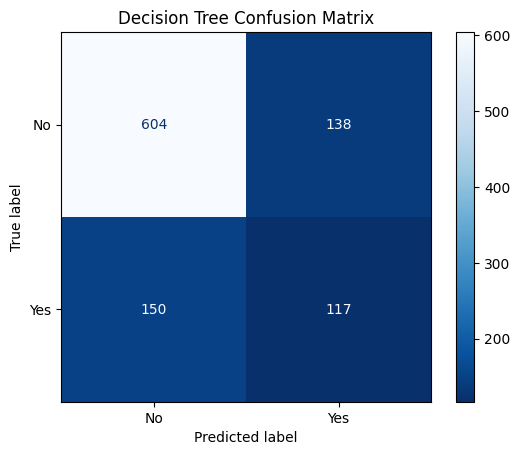

In [62]:
evaluate_model(y_test_encoded,y_pred_dt,'Decision Tree Confusion Matrix')

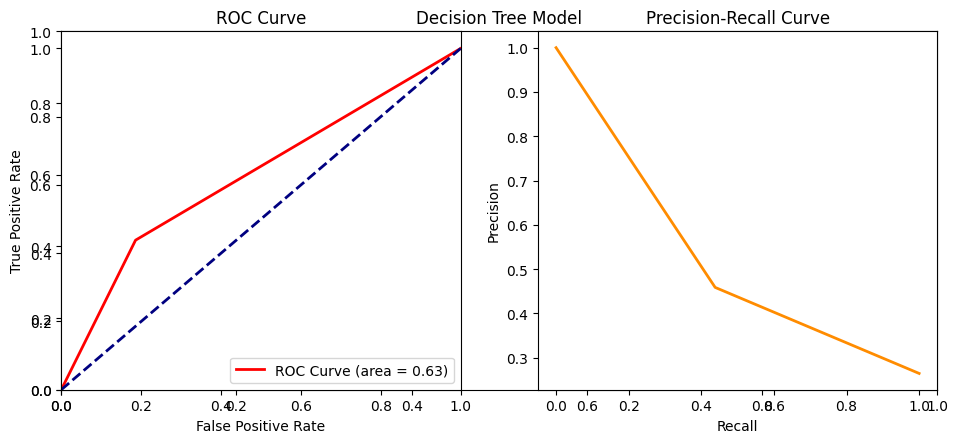

In [63]:
plot_evaluation_curves(y_test_encoded,y_pred_dt,'Decision Tree Model')

The decision tree model has an accuracy of 0.73.

**Precision-Recall Curve**
In this case, the curve starts with high precision and low recall. As recall increases, precision decreasessuggesting that the model becomes less certain about its positive predictions as it tries to capture all positive instances.

This is a typical behavior, indicating that the model identifies fewer true positives with high certainty (high precision) and more true positives with less certainty (lower precision) as it tries to capture all positive instances.

**ROC Curve**
The model's ROC curve shows that it has a decent ability to discriminate between positive and negative classes, with an AUC of 0.64.

### **Feature Importance and selection**

In [64]:
# Feature selection
selector = SelectKBest(score_func=f_classif, k=25)
selector.fit(encoded_df, y_train_encoded)

# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
features_df_new =encoded_df.iloc[:,cols]

print("Selected Features DataFrame:")
print(features_df_new)

Selected Features DataFrame:
        tenure  MonthlyCharges  SeniorCitizen_0  Dependents_No  \
0     0.969448        0.970550              1.0            1.0   
1    -0.503205        1.048407              1.0            0.0   
2     0.110400       -1.305530              1.0            0.0   
3    -0.175949        1.041781              1.0            1.0   
4    -0.707740        0.592860              0.0            1.0   
...        ...             ...              ...            ...   
4029  1.133076       -0.520332              0.0            1.0   
4030 -1.239532        0.962267              1.0            1.0   
4031  0.519471       -0.468979              1.0            0.0   
4032 -0.053228       -1.305530              1.0            0.0   
4033  0.355842        0.534881              1.0            1.0   

      Dependents_Yes  InternetService_Fiber optic  InternetService_No  \
0                0.0                          1.0                 0.0   
1                1.0            

In [67]:
features_df_new.columns.to_list()

['tenure',
 'MonthlyCharges',
 'SeniorCitizen_0',
 'Dependents_No',
 'Dependents_Yes',
 'InternetService_Fiber optic',
 'InternetService_No',
 'OnlineSecurity_No',
 'OnlineSecurity_Yes',
 'OnlineSecurity_None',
 'OnlineBackup_No',
 'OnlineBackup_None',
 'DeviceProtection_No',
 'DeviceProtection_None',
 'TechSupport_No',
 'TechSupport_Yes',
 'TechSupport_None',
 'StreamingTV_None',
 'StreamingMovies_None',
 'Contract_Month-to-month',
 'Contract_One year',
 'Contract_Two year',
 'PaperlessBilling_No',
 'PaperlessBilling_Yes',
 'PaymentMethod_Electronic check']

In [69]:
test_features=test_encoded_df[['tenure', 'MonthlyCharges', 'SeniorCitizen_0', 'Dependents_No', 'Dependents_Yes', 'InternetService_Fiber optic',
 'InternetService_No', 'OnlineSecurity_No', 'OnlineSecurity_Yes', 'OnlineSecurity_None', 'OnlineBackup_No', 'OnlineBackup_None',
 'DeviceProtection_No', 'DeviceProtection_None', 'TechSupport_No', 'TechSupport_Yes', 'TechSupport_None', 'StreamingTV_None',
 'StreamingMovies_None', 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 'PaperlessBilling_No',
 'PaperlessBilling_Yes', 'PaymentMethod_Electronic check']]

#### **Hyperparameter Tuning**

In [65]:
# Define parameter grids
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

rf_param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt_param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

gb_param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 5, 7, 9],
    'subsample': [0.7, 0.8, 0.9, 1.0]
}

# Initialize classifiers
knn = KNeighborsClassifier()
rf = RandomForestClassifier(random_state=42)
dt = DecisionTreeClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)

# Perform GridSearchCV for KNN
knn_grid_search = GridSearchCV(estimator=knn, param_grid=knn_param_grid, cv=5, n_jobs=-1, scoring='accuracy')
knn_grid_search.fit(X_train_1, y_train_encoded)
knn_best_params = knn_grid_search.best_params_
knn_best_score = knn_grid_search.best_score_

# Perform RandomizedSearchCV for Random Forest
rf_random_search = RandomizedSearchCV(estimator=rf, param_distributions=rf_param_grid, n_iter=50, cv=5, n_jobs=-1, random_state=42, scoring='accuracy')
rf_random_search.fit(X_train_1, y_train_encoded)
rf_best_params = rf_random_search.best_params_
rf_best_score = rf_random_search.best_score_

# Perform GridSearchCV for Decision Tree
dt_grid_search = GridSearchCV(estimator=dt, param_grid=dt_param_grid, cv=5, n_jobs=-1, scoring='accuracy')
dt_grid_search.fit(X_train_1, y_train_encoded)
dt_best_params = dt_grid_search.best_params_
dt_best_score = dt_grid_search.best_score_

# Perform GridSearchCV for Gradient Boosting
gb_grid_search = GridSearchCV(estimator=gb, param_grid=gb_param_grid, cv=5, n_jobs=-1, scoring='accuracy')
gb_grid_search.fit(X_train_1, y_train_encoded)
gb_best_params = gb_grid_search.best_params_
gb_best_score = gb_grid_search.best_score_

# Evaluate the best models on the test set
knn_best_model = knn_grid_search.best_estimator_
rf_best_model = rf_random_search.best_estimator_
dt_best_model = dt_grid_search.best_estimator_
gb_best_model = gb_grid_search.best_estimator_

knn_test_pred = knn_best_model.predict(x_test_1)
rf_test_pred = rf_best_model.predict(x_test_1)
dt_test_pred = dt_best_model.predict(x_test_1)
gb_test_pred = gb_best_model.predict(x_test_1)

knn_test_accuracy = accuracy_score(y_test_encoded, knn_test_pred)
rf_test_accuracy = accuracy_score(y_test_encoded, rf_test_pred)
dt_test_accuracy = accuracy_score(y_test_encoded, dt_test_pred)
gb_test_accuracy = accuracy_score(y_test_encoded, gb_test_pred)

print(f'Best KNN params: {knn_best_params}, Best cross-validation accuracy: {knn_best_score:.4f}, Test set accuracy: {knn_test_accuracy:.4f}')
print(f'Best Random Forest params: {rf_best_params}, Best cross-validation accuracy: {rf_best_score:.4f}, Test set accuracy: {rf_test_accuracy:.4f}')
print(f'Best Decision Tree params: {dt_best_params}, Best cross-validation accuracy: {dt_best_score:.4f}, Test set accuracy: {dt_test_accuracy:.4f}')
print(f'Best Gradient Boosting params: {gb_best_params}, Best cross-validation accuracy: {gb_best_score:.4f}, Test set accuracy: {gb_test_accuracy:.4f}')

Best KNN params: {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'uniform'}, Best cross-validation accuracy: 0.7848, Test set accuracy: 0.7869
Best Random Forest params: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 20}, Best cross-validation accuracy: 0.8014, Test set accuracy: 0.8127
Best Decision Tree params: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}, Best cross-validation accuracy: 0.7561, Test set accuracy: 0.7740
Best Gradient Boosting params: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.9}, Best cross-validation accuracy: 0.7995, Test set accuracy: 0.8107


#### **Final Model Comparison & Selection**

|**Model**|**Cross validation accuracy**|**Test set Accuracy**|
|--------|-----------------------------|---------------------|
|knn|0.7848|0.7869|
|Random Forest|0.8014|0.8127|
|Decision Tree|0.7561|0.7740|
|Gradient Boosting |0.7995|0.8107|

The model with the beat crossvalidation and test set accuracy is the **Random Forest Model** with 0.8014 and 0.8127. On this basis we select the Random Forest model as our final model for the project. 

The hyperparameter to use with this model are as follows:
**n_estimators: 50, min_samples_split: 5, min_samples_leaf: 4, max_depth: 20**

#### **Retrain Model with best Parameters**

The model will be trained based on the selected hyperparameters and features 

In [83]:
rf_pipeline_1 = Pipeline([
    ('classifier', RandomForestClassifier(n_estimators=50,min_samples_split=5,max_depth=20 ,min_samples_leaf=4,random_state=42))  
])

rf_pipeline_1.fit(features_df_new, y_train_encoded)

y_pred_rf_1=rf_pipeline_1.predict(test_features)

**Evaluate the Model**


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.93      0.88       742
           1       0.72      0.52      0.60       267

    accuracy                           0.82      1009
   macro avg       0.78      0.72      0.74      1009
weighted avg       0.81      0.82      0.81      1009


Accuracy Score:
0.8186323092170465


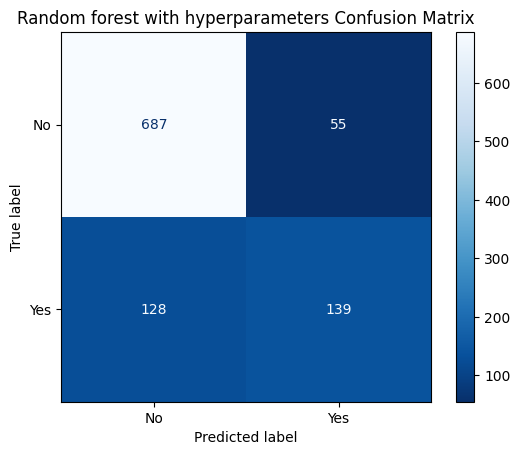

In [84]:
evaluate_model(y_test_encoded,y_pred_rf_1,'Random forest with hyperparameters Confusion Matrix')

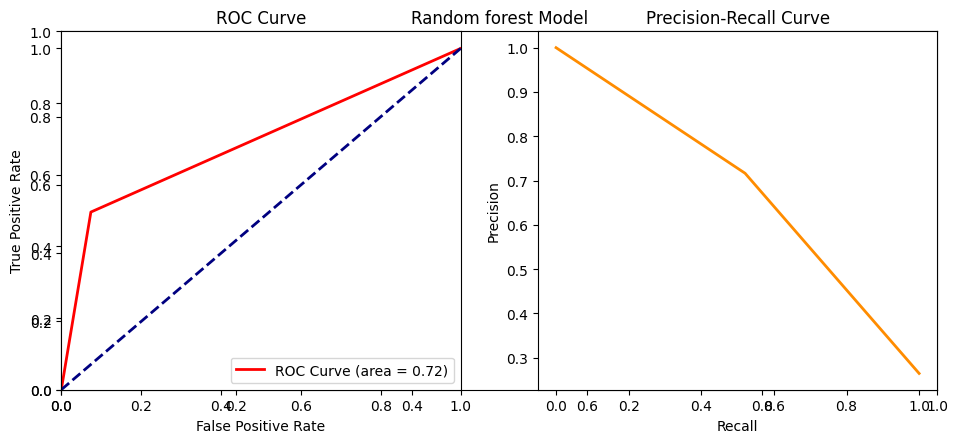

In [85]:
plot_evaluation_curves(y_test_encoded,y_pred_rf_1,'Random forest Model')